In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy

In [2]:
data = np.load('data_regr.npz')
x, y = data['X'], data['y']
print(f'x shape: {x.shape}\n{x}\n-------\ny shape: {y.shape}\n{y}')
N, K = x.shape

x shape: (200, 100)
[[ 1.76706661 -0.4975975  -0.03444351 ...  1.73569106 -0.33698884
   2.14405031]
 [-0.50636185 -1.16828581  2.33201983 ... -0.16680302 -0.45529377
   0.26551499]
 [ 0.65746564  1.40731982  0.78126377 ...  0.5158309  -0.38446612
   1.50187616]
 ...
 [ 1.36958463  0.62517379  1.41017959 ... -0.26924866  1.11085275
  -0.06452083]
 [-1.74258977 -0.03416932  0.77730475 ... -0.17397943 -0.65257741
   0.30195968]
 [-0.40796983  0.19936057  0.43261589 ... -1.10157721 -1.28052194
   0.13658914]]
-------
y shape: (200,)
[  2.8997763  -13.6469215    4.63823751   9.85788167 -14.9287738
   5.46822556   5.71131221   0.86808855  -8.47496059   0.37017779
   9.13431062   6.61721153   6.71355763  14.09662347 -11.16979018
  -5.04395015  -3.6699489   17.91837553  -0.99669864  -6.73960291
  12.5473094   -1.42904872   9.32800457   4.29742467   9.31211804
  -8.02361555   7.74889103   9.90010402 -24.03276676  -3.35722367
 -12.84637875   9.26477139   4.12744739  -8.36903531 -20.09909916
 -1

The dependence between $x$ and $y$ is linear:
$$ y_i = a \cdot x_i + \varepsilon_i, $$
where $a$ is a vector $a \in \mathbb{R}^k$ and $\varepsilon_i$ is random noise.

Our task is to solve the linear regression problem with regularization, i.e. to minimize
$$ L_n(a) = \sum_i \left( y_i - a\cdot x_i \right)^2  + \lambda \left| a \right|_n, $$
where $n$ is usually $1$ or $2$.

In [3]:
def solve(reg_weight: float, order: int = 2):
    weights = cvxpy.Variable(K)
    loss = cvxpy.sum((y - x @ weights)**2) + reg_weight * cvxpy.norm(weights, order)
    objective = cvxpy.Minimize(loss)
    problem = cvxpy.Problem(objective, None)
    return problem.solve(solver=cvxpy.CLARABEL), weights.value

### n = 2

In [4]:
reg_weights = np.linspace(0, 5000, 500)
residuals = np.zeros(reg_weights.shape)
a_norm = np.zeros(residuals.shape)
for i in range(reg_weights.shape[0]):
    percentage = int((i + 1) / 5)
    print('['+'='*percentage + '-'*(100-percentage)+f'] {percentage}% complete', end='\r')
    _, a1 = solve(reg_weights[i])
    residuals[i] = np.linalg.norm(y - x @ a1)
    a_norm[i] = np.linalg.norm(a1)

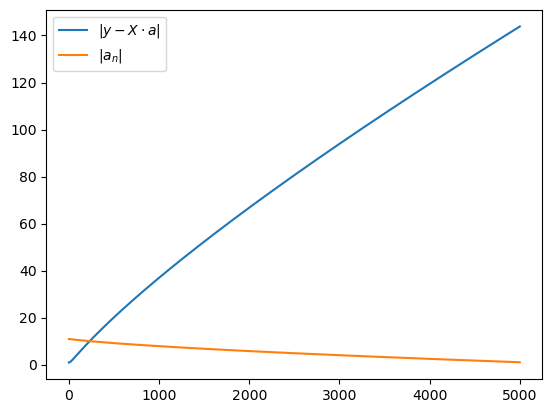

In [5]:
plt.plot(reg_weights, residuals, label=r'$|y - X\cdot a|$')
plt.plot(reg_weights, a_norm, label=r'$|a_n|$')
plt.legend()
plt.show()

### n = 1

In [6]:
reg_weights = np.linspace(0, 5000, 500)
residuals = np.zeros(reg_weights.shape)
a_norm = np.zeros(residuals.shape)
for i in range(reg_weights.shape[0]):
    percentage = int((i + 1) / 5)
    print('['+'='*percentage + '-'*(100-percentage)+f'] {percentage}% complete', end='\r')
    _, a1 = solve(reg_weights[i], 1)
    residuals[i] = np.linalg.norm(y - x @ a1)
    a_norm[i] = np.linalg.norm(a1)

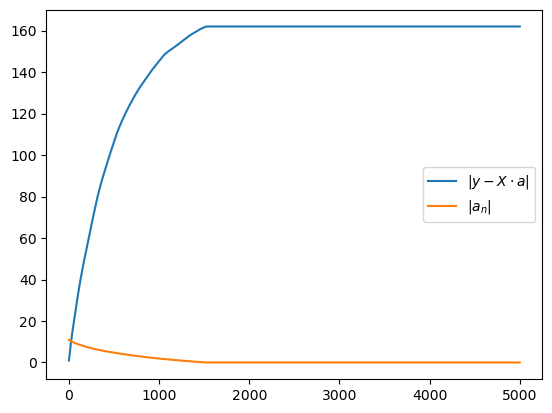

In [7]:
plt.plot(reg_weights, residuals, label=r'$|y - X\cdot a|$')
plt.plot(reg_weights, a_norm, label=r'$|a_n|$')
plt.legend()
plt.show()

Since $L1$-norm has (quasi-)constant gradient, it should effectively "exclude" insignificant inputs by
zeroing the corresponding weights in $a$ vector. So, it's better to use $L1$ norm to decide which ones are significant and
which are not.

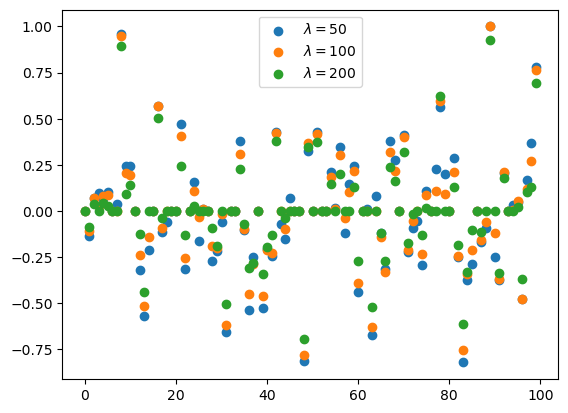

In [26]:
_, a_1000 = solve(reg_weight=50, order=1)
_, a_1200 = solve(reg_weight=100, order=1)
_, a_2000 = solve(reg_weight=200, order=1)
indices = np.arange(len(a_1000))
plt.scatter(indices, a_1000 / a_1000.max(), label=r'$\lambda=50$')
plt.scatter(indices, a_1200 / a_1200.max(), label=r'$\lambda=100$')
plt.scatter(indices, a_2000 / a_1200.max(), label=r'$\lambda=200$')
plt.legend()
plt.show()

There are clearly some indices that are significantly smaller than others, that appear as a straight line $y = 0$.